In [1]:
from numpy import mean, cov, cumsum, dot, linalg, size, flipud, real 
import cv2 as cv
from matplotlib import pyplot as plt

class PrincipleComponets():
    def __init__(self, num_of_pc, image_matrix):
        self.num_of_pc = num_of_pc
        self.image_matrix = image_matrix
    
    def pc(self, image_matrix):
        """
        Computing eigenvalues and eigenvectors of covariance matrix
        """
        # subtract the mean (along columns)
        M = (image_matrix - mean(image_matrix.T, axis = 1)).T 
        [latent, coeff] = linalg.eig(cov(M))

        p = size(coeff, axis = 1)
        # sorting the eigenvalues in ascending order
        idx = latent.argsort() 
        idx = idx[::-1]       
        # sorting eigenvectors according to the sorted eigenvalues
        coeff = coeff[:, idx]
        latent = latent[idx] 
        # sorting eigenvalues
        if self.num_of_pc < p and self.num_of_pc >= 0:
            # cutting some PCs if needed
            coeff = coeff[:, range(self.num_of_pc)] 
        # projection of the data in the new space
        score = dot(coeff.T, M) 

        return coeff, score, latent

    def fit(self):
        """
        Applying pc algorythm to an image
        """
         # to get a 2-D array
        image_matrix = mean(self.image_matrix, 2)
        # numbers of all the principal components
        full_pc = size(image_matrix, axis = 1) 
        coeff, score, latent = self.pc(image_matrix)
        
        # image reconstruction
        reconstructed_image_matrix = dot(coeff, score).T + mean(image_matrix, axis = 0)
        return real(reconstructed_image_matrix)
  

        


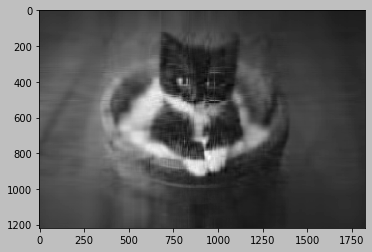

In [2]:
img = cv.imread('Beata-Miro.jpg') 
new_img = PrincipleComponets(15, img)

my_img = new_img.fit()
plt.style.use('grayscale')
plt.imshow(my_img)
plt.show() 